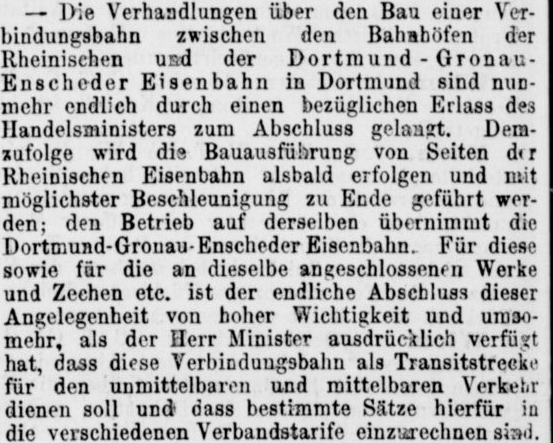

In [1]:
import PIL.Image

image = PIL.Image.open("../data/input/antiqua.png")
image

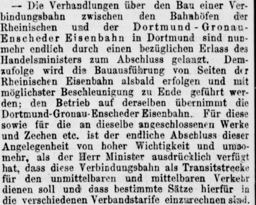

In [2]:
image_sm = image.copy()
image_sm.thumbnail((256, 256), resample= PIL.Image.BICUBIC)
image_sm

In [3]:
import tesserocr

https://github.com/sirfz/tesserocr

In [4]:
print(tesserocr.tesseract_version())

tesseract 5.0.0
 leptonica-1.82.0
  libgif 5.2.1 : libjpeg 9d : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.1 : libopenjp2 2.4.0


In [5]:
print(tesserocr.get_languages())

('/opt/homebrew/share/tessdata/', ['afr', 'amh', 'ara', 'asm', 'aze', 'aze_cyrl', 'bel', 'ben', 'bod', 'bos', 'bre', 'bul', 'cat', 'ceb', 'ces', 'chi_sim', 'chi_sim_vert', 'chi_tra', 'chi_tra_vert', 'chr', 'cos', 'cym', 'dan', 'deu', 'div', 'dzo', 'ell', 'eng', 'enm', 'epo', 'equ', 'est', 'eus', 'fao', 'fas', 'fil', 'fin', 'fra', 'frk', 'frm', 'fry', 'gla', 'gle', 'glg', 'grc', 'guj', 'hat', 'heb', 'hin', 'hrv', 'hun', 'hye', 'iku', 'ind', 'isl', 'ita', 'ita_old', 'jav', 'jpn', 'jpn_vert', 'kan', 'kat', 'kat_old', 'kaz', 'khm', 'kir', 'kmr', 'kor', 'kor_vert', 'lao', 'lat', 'lav', 'lit', 'ltz', 'mal', 'mar', 'mkd', 'mlt', 'mon', 'mri', 'msa', 'mya', 'nep', 'nld', 'nor', 'oci', 'ori', 'osd', 'pan', 'pol', 'por', 'pus', 'que', 'ron', 'rus', 'san', 'script/Arabic', 'script/Armenian', 'script/Bengali', 'script/Canadian_Aboriginal', 'script/Cherokee', 'script/Cyrillic', 'script/Devanagari', 'script/Ethiopic', 'script/Fraktur', 'script/Georgian', 'script/Greek', 'script/Gujarati', 'script/Gu

In [6]:
with tesserocr.PyTessBaseAPI(psm=tesserocr.PSM.AUTO_ONLY) as api:
    api.SetImage(image)
    api.Recognize()

    it = api.GetIterator()
    assert it
    
    level = tesserocr.RIL.TEXTLINE
    for r in tesserocr.iterate_level(it, level):
        if r:
            print(r.GetUTF8Text(level).strip())

—- Die Verhandlungen iiber den Bau einer Ver-
bindungsbahn zwischen den Bahabifen der
Rheinischen und der Dortmund - Gronau-
Enscheder Eisenbahn in Dortmund sind nun-
mehr endlich durch einen beziiglichen Erlass des
Handelsministers zum Abschluss gelangt. Dem-
zufolge wird die Bauausfiihrung von Seiten der
Rheinischen Eisenbahn alsbald erfolgen und mit
miglichster Beschleunigung zu Ende gefiihrt wer-
den; den Betrieb auf derselben iibernimmt die
Dortmund-Gronau-Enscheder Kisenbahn. Fiir diese
sowie fir die an dieselbe angeschlossenen Werke
und Zeehen ete. ist der endliche Absebluss dieser
Angelegenheit von hoher Wichtigkeit und umao-
mehr, als der Herr Minister ausdriicklich verfiigt
at, dass diese Verbindungsbahn als Transitstreeke
r den unmittelbaren und mittelbaren Verketr
dienen soll und dass bestimmte Sitze hierfiir in
die verschiedenen Verbandstarife einzuwrechnen sind,




In [7]:
?tesserocr.RIL

Init signature: tesserocr.RIL(self, /, *args, **kwargs)
Docstring:     
An enum that defines available Page Iterator levels.

Attributes:
    BLOCK: of text/image/separator line.
    PARA: within a block.
    TEXTLINE: within a paragraph.
    WORD: within a textline.
    SYMBOL: character within a word.
File:           ~/miniconda3/envs/ocr-tut-2022/lib/python3.9/site-packages/tesserocr.cpython-39-darwin.so
Type:           type
Subclasses:     


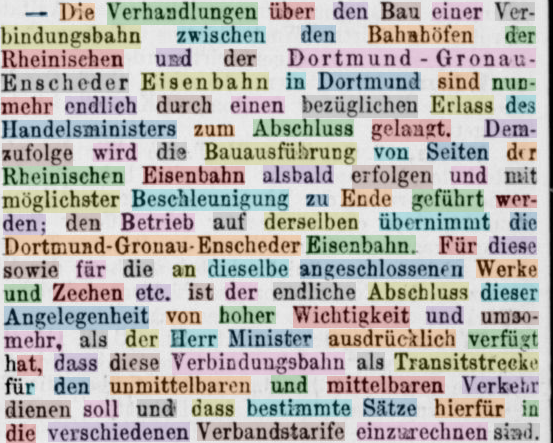

In [8]:
import PIL.Image
import PIL.ImageDraw
import matplotlib.cm
import numpy as np

colors = [tuple(c) for c in (
    np.array(matplotlib.cm.get_cmap('tab20').colors) * 255).astype(np.uint8)]

def layout(elements):
    with tesserocr.PyTessBaseAPI(psm=tesserocr.PSM.AUTO_ONLY) as api:
        api.SetImage(image)

        annotated = image.copy().convert("RGB")
        draw = PIL.ImageDraw.Draw(annotated)
        
        for i, data in enumerate(elements(api)):
            bbox = data[1]
            
            x = bbox["x"]
            y = bbox["y"]
            w = bbox["w"]
            h = bbox["h"]
            
            color = colors[(i * 2) % len(colors)]
            draw.rectangle(((x, y), (x + w, y + h)), fill=color)

    return PIL.Image.blend(annotated, image.convert("L").convert("RGB"), 0.75)       
    
#layout(lambda api: api.GetRegions())
#layout(lambda api: api.GetStrips())
layout(lambda api: api.GetWords())
#layout(lambda api: api.GetConnectedComponents())

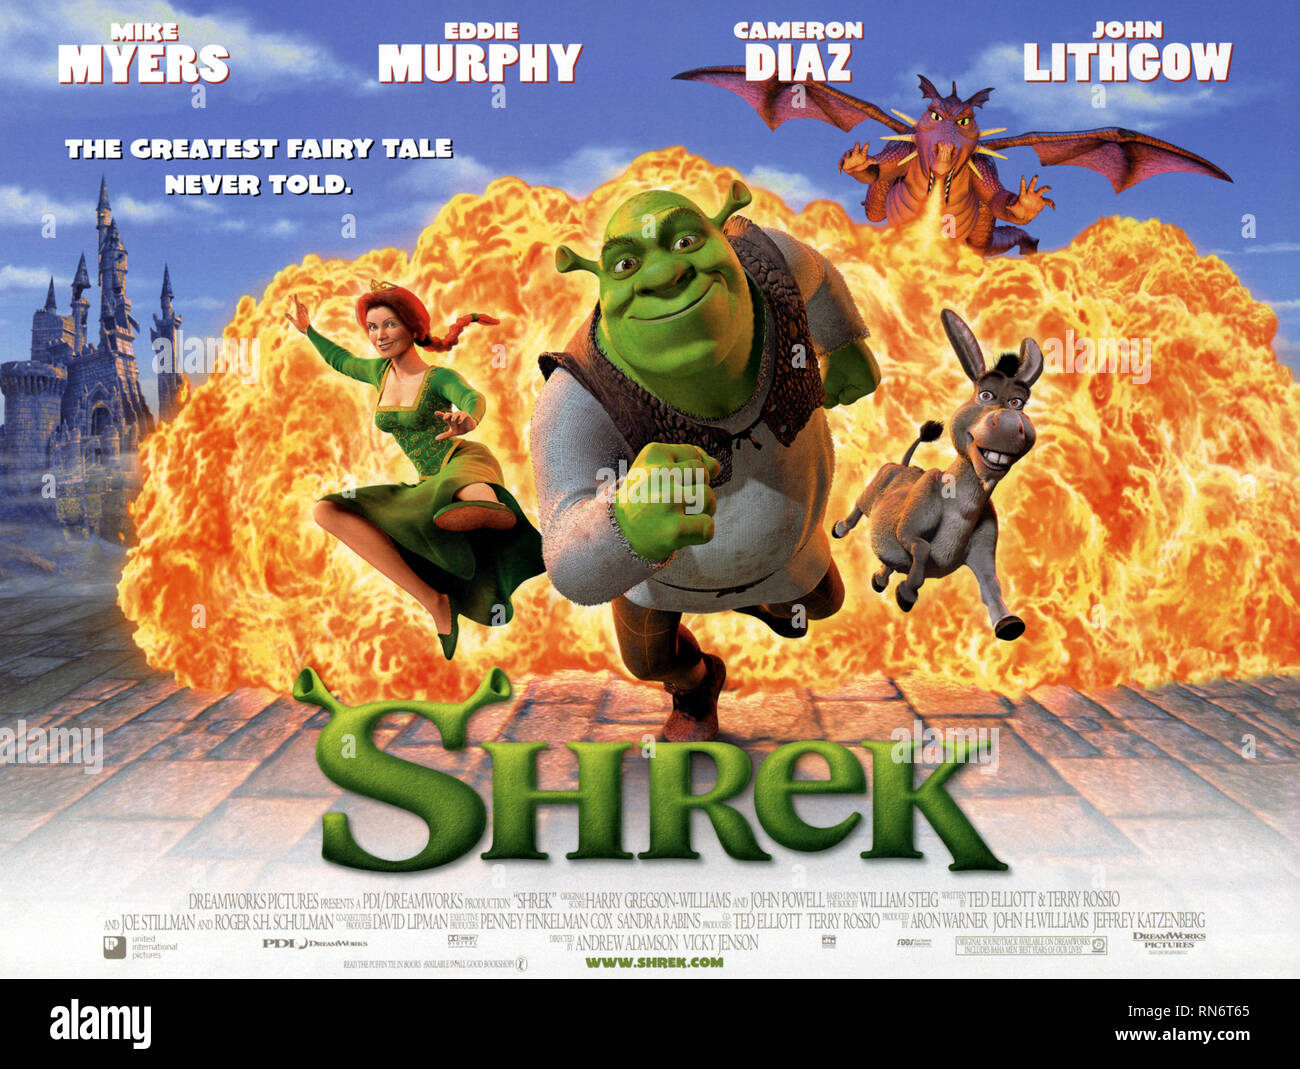

In [9]:
image2 = PIL.Image.open("../data/input/film-poster-shrek-2001.jpg")
image2

In [10]:
with tesserocr.PyTessBaseAPI(psm=tesserocr.PSM.AUTO_ONLY) as api:
    api.SetImage(image2)
    print(api.GetUTF8Text())

og CIKE eg EDDIE
MYERS MURPHY

THE GRE! ST FAIRY TALE,

 

alam image 0 eNeTeS
www.alamy.com

